# Neural Network practice - Classification and Regression

The University of California, Irvine - UCI - is a well-known repository that concentrates a lot of free-use datasets for machine learning applications and research

https://archive.ics.uci.edu/ml/index.php

In [1]:
### import the libraries and modules required

# libraries to manipulate the data and to visualise it
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# this is the library that contains the NN capabilities
# import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# the evaluation metrics for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
# the evaluation metrics for regression
from sklearn.metrics import r2_score
# from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
# from math import sqrt
import seaborn as sn
# for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

## Import the data, prepare and visualise it

In the iris. Names file it is described the details of the dataset, including the attribute Information:

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [2]:
# generate a pandas dataframe with the file that contains the dataset
dataset = pd.read_csv(filepath_or_buffer = 'iris.data', names = ['sepal length','sepal width','petal length','petal width', 'species'])

# take a look of the data
print('The dataset contains {} observations and {} features\n'.format(dataset.shape[0],dataset.shape[1]))

dataset.head()

The dataset contains 150 observations and 5 features



,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# check how many observations we have for each class/species
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [4]:
# use the five-number analysis to get statiscally explore the dataset
dataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


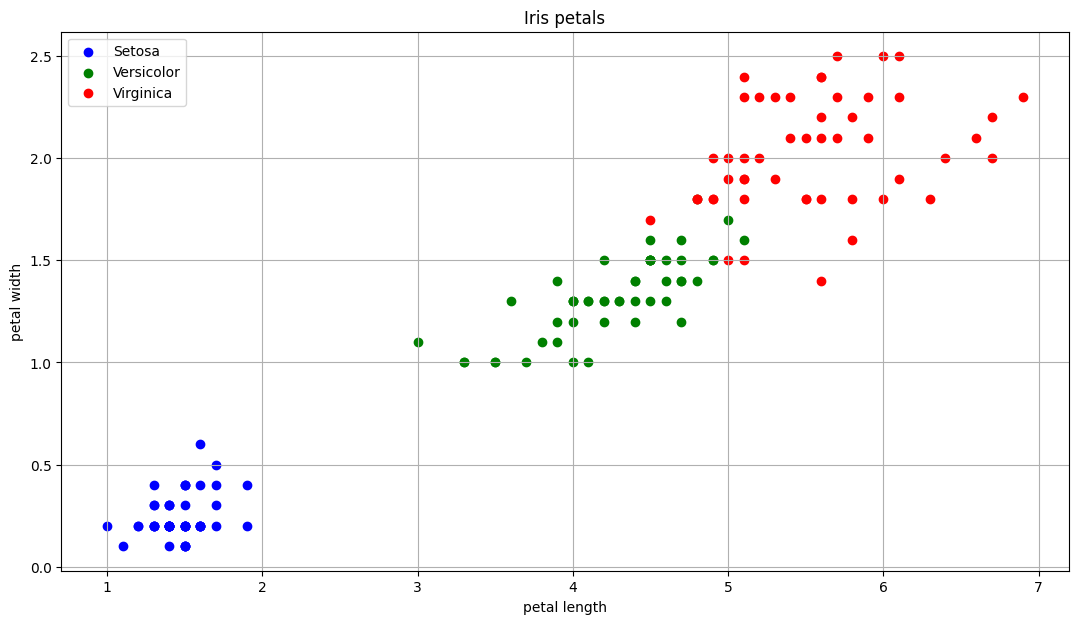

In [5]:
### visualise the dataset
# plot the petal length vs the petal width (a two dimmensional data)

setosa = dataset[dataset.species == "Iris-setosa"]
versicolor = dataset[dataset.species=='Iris-versicolor']
virginica = dataset[dataset.species=='Iris-virginica']
fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot
# lables and scatter points
ax.scatter(setosa['petal length'], setosa['petal width'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length'], versicolor['petal width'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length'], virginica['petal width'], label="Virginica", facecolor="red")
ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

## Generating the Training and Testing datasets

In [6]:
### Dropping the species feature since this is the feature that we are interested in

# X will be our dataset without the feature of interest
X = dataset.drop('species', axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]

# y will be our dataset with the feature of interest
y = dataset['species']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [7]:
print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# since the values of the features are of different ranges, it is mandatory to 
#   scale them since the ML models are sensitive to these variations


sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
sepal length            4.3
sepal width             2.0
petal length            1.0
petal width             0.1
species         Iris-setosa
dtype: object
Max values of the dataset are: 
sepal length               7.9
sepal width                4.4
petal length               6.9
petal width                2.5
species         Iris-virginica
dtype: object
Min values of the scaled dataset are: 
-1.6626185422078956
Max values of the scaled dataset are: 
1.6418617534492592


## Classification

In [8]:
# defining a Multi-layer Perceptron classifier
mlp_clf = MLPClassifier(
    # defining the layers
    #   the number of neurons in each layer
    hidden_layer_sizes=2,
    # maximum number of iterations for the solver
    max_iter = 300,
    # transfer/activation function
    #   relu = the rectified linear unit function, returns f(x) = max(0, x)
    activation = 'relu',
    # optimiser of the weights
    #   adam = refers to a stochastic gradient-based optimizer proposed by 
    #          Kingma, Diederik, and Jimmy Ba
    solver = 'adam'
    )

### Training

In [9]:
# training the model
mlp_clf.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=2, max_iter=300)

### Testing

In [10]:
# we need to pass the dataset we have prepared for testing
y_pred = mlp_clf.predict(X_test_scaled)
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-vi

### Evaluation

In [11]:
### there are several evaluation metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html

# Accuracy
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# precision, recall, f1-score, and support
#   please be aware of the metrics we have and what we can use
#   the f1-score is for binary targets
print(classification_report(y_test, y_pred))

Accuracy: 0.60
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        29
Iris-versicolor       0.43      1.00      0.61        23
 Iris-virginica       1.00      0.96      0.98        23

       accuracy                           0.60        75
      macro avg       0.48      0.65      0.53        75
   weighted avg       0.44      0.60      0.49        75



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

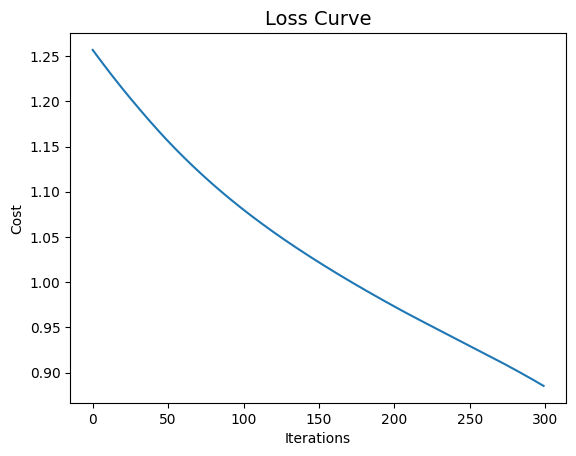

In [12]:
# see how well was the training of the model
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

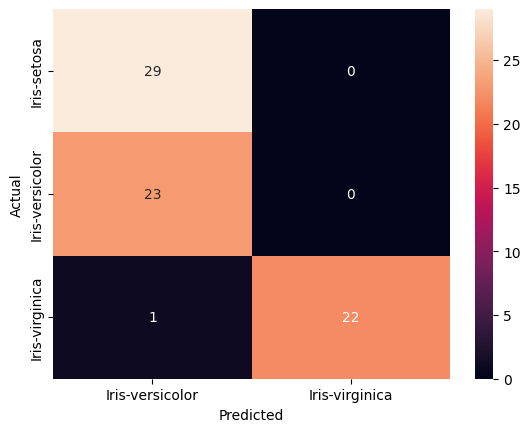

In [13]:
### see how well was the testing of the model

# generate the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [14]:
# take a look at the predictions
y_pred_pd = pd.DataFrame(y_pred)
print('Predictions \n{}\n'.format(y_pred_pd.describe()))

# take a look at the true examples
print('Groundtruth \n{}'.format(y_test.describe()))

Predictions 
                      0
count                75
unique                2
top     Iris-versicolor
freq                 53

Groundtruth 
count              75
unique              3
top       Iris-setosa
freq               29
Name: species, dtype: object


## Hyper parameter Tuning

In [15]:
# we can define a set of parameters that we are interested to train with our 
#   model
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80), 100],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    # Strength of the L2 regularization term
    # “Regularization is any modification we make to a learning algorithm that 
    #   is intended to reduce its generalization error but not its training 
    #   error.” — Ian Goodfellow
    'alpha': [0.0001, 0.05],
    # a value that works as the temperature in the simulated annealing algorithm
    #   but for the stochastic gradient descent algorithm
    'learning_rate': ['constant','adaptive'],
}

In [16]:
# we define a grid search approach to train several models with Cross-validation

grid = GridSearchCV(
    # the structure of the model we are interest in
    mlp_clf,
    # the different hyper parameters we want to train
    param_grid,
    # use paralelisation. -1 = use all processors
    n_jobs = -1,
    # number of folds use in cross-validation approach
    cv = 5
    )

In [17]:
# execute the hyper parameter tuning
#   this process can take a while
grid.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (

GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=2, max_iter=300),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80), 100],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100, 150],
                         'solver': ['sgd', 'adam']})

In [18]:
# get the best values for each hyper parameter tuned
print('The best hyper parameter values are:\n{}'.format(grid.best_params_))

The best hyper parameter values are:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (120, 80), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'sgd'}


In [19]:
# save the results as pandas dataframe to easily interact with the data
grid_results = pd.DataFrame(grid.cv_results_)

In [20]:
# show the results of the grid search hyper parameter tuning by best scores
grid_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
58,0.078294,0.021347,0.000404,0.000162,tanh,0.05,"(120, 80)",adaptive,150,sgd,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.866667,0.933333,1.000000,1.000000,1.000000,0.960000,0.053333,1
22,0.072171,0.008838,0.000320,0.000007,tanh,0.0001,"(120, 80)",adaptive,150,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.866667,0.933333,1.000000,1.000000,1.000000,0.960000,0.053333,1
10,0.126516,0.009924,0.000396,0.000039,tanh,0.0001,"(150, 100, 50)",adaptive,150,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.866667,0.933333,1.000000,1.000000,0.933333,0.946667,0.049889,3
105,0.018306,0.007610,0.000352,0.000178,relu,0.0001,100,adaptive,100,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.866667,0.866667,1.000000,1.000000,1.000000,0.946667,0.065320,3
127,0.019446,0.005739,0.000338,0.000025,relu,0.05,"(120, 80)",adaptive,50,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.866667,0.933333,1.000000,1.000000,0.933333,0.946667,0.049889,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0.008860,0.005648,0.000289,0.000160,tanh,0.0001,100,constant,50,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.666667,0.600000,0.666667,0.866667,0.666667,0.693333,0.090431,140
30,0.012592,0.007859,0.000258,0.000033,tanh,0.0001,100,adaptive,50,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.800000,0.600000,0.666667,0.666667,0.666667,0.680000,0.065320,141
60,0.007596,0.003111,0.000229,0.000026,tanh,0.05,100,constant,50,sgd,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.600000,0.600000,0.800000,0.666667,0.666667,0.666667,0.073030,142
84,0.024443,0.002441,0.000443,0.000274,relu,0.0001,"(120, 80)",constant,50,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.600000,0.733333,0.666667,0.666667,0.666667,0.666667,0.042164,142


## Regression

Regression only works with numeric values.

Let's take a look at the original dataset one more time.

In [21]:
dataset.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


As we can see, the species values are not adequate for this purpose; at least, not until we code them

In [22]:
# here we generate a straight forward coder
def coder(specie):
    if specie == 'Iris-setosa':
        return 0
    elif specie == 'Iris-versicolor':
        return 1
    else:
        return 2

# applying the coder to the feature of interest
dataset['species'] = dataset['species'].apply(coder)

In [23]:
dataset.groupby('species').size()

species
0    50
1    50
2    50
dtype: int64

### Generating the Training and Testing datasets

In [24]:
### Dropping the species feature since this is the feature that we are interested in

# X will be our dataset without the feature of interest
X = dataset.drop('species', axis=1)

# converting into numpy array and assigning sepal length and sepal width
X = X.to_numpy()[:, (0,1)]

# y will be our dataset with the feature of interest
y = dataset['species']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [25]:
print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# since the values of the features are of different ranges, it is mandatory to 
#   scale them since the ML models are sensitive to these variations


sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
sepal length    4.3
sepal width     2.0
petal length    1.0
petal width     0.1
species         0.0
dtype: float64
Max values of the dataset are: 
sepal length    7.9
sepal width     4.4
petal length    6.9
petal width     2.5
species         2.0
dtype: float64
Min values of the scaled dataset are: 
-2.055362392160273
Max values of the scaled dataset are: 
2.647585454308145


### Defining the regression model

In [26]:
# defining a Multi-layer Perceptron regresor
mlp_reg = MLPRegressor(
    # defining the layers
    #   the number of neurons in each layer
    hidden_layer_sizes=2,
    # maximum number of iterations for the solver
    max_iter = 300,
    # transfer/activation function
    #   relu = the rectified linear unit function, returns f(x) = max(0, x)
    activation = 'relu',
    # optimiser of the weights
    #   adam = refers to a stochastic gradient-based optimizer proposed by 
    #          Kingma, Diederik, and Jimmy Ba
    solver = 'adam'
    )

### Training

In [27]:
# training the model
mlp_reg.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=2, max_iter=300)

### Testing

In [28]:
# we need to pass the dataset we have prepared for testing
y_pred = mlp_reg.predict(X_test_scaled)
y_pred

array([ 0.09566087,  0.97466095,  0.60425239,  0.15654542,  0.41084118,
        0.41594243, -0.02355761,  0.77359788,  0.79710916, -0.10940432,
        0.69940515, -0.10940432,  0.5668785 , -0.10940432,  0.7045064 ,
        0.71526395,  0.48758453,  0.50069017, -0.08444217,  0.23073815,
       -0.10940432,  0.30748149,  0.23583939,  0.23073815,  1.96522765,
        0.57763605,  0.04808449,  0.83448243, -0.10940432, -0.10940432,
        0.26755698,  1.61012282,  0.68354636,  0.14578787, -0.10940432,
        0.01473282,  0.65437939,  0.43180122,  0.44766002,  1.06726309,
       -0.10940432,  0.68609698,  0.68354636,  0.94549399,  0.73367336,
        0.80776394,  0.18571239,  0.54846908,  0.53261029,  1.43822671,
        0.02146814,  0.98286788,  0.0823527 ,  0.38677546,  0.81607301,
       -0.10940432,  0.32589091,  0.3417497 ,  0.7045064 ,  2.10548147,
        0.07980207,  0.14578787, -0.10940432,  0.17495484,  0.0253876 ,
        0.28086515,  0.12737846,  1.87517613, -0.10940432,  0.24

### Evaluation

In [29]:
### there are several evaluation metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html

# r2
#   Best possible score is 1.0 and it can be negative 
#   (because the model can be arbitrarily worse)
print('r2: {:.2f}'.format(r2_score(y_test, y_pred)))

# mean square error
#   Best value is 0.0
print('mse: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# explained_variance_score
#   Best value is 1.0, lower values are worse
print('explained variance: {:.2f}'.format(explained_variance_score(y_test, y_pred)))

r2: -0.50
mse: 1.03
explained variance: -0.19


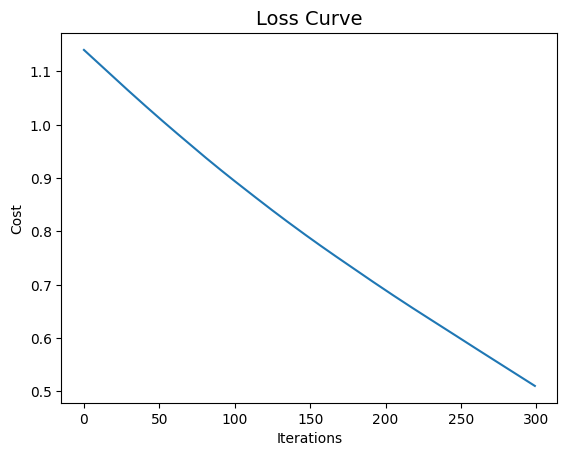

In [30]:
# see how well was the training of the model
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<Axes: >

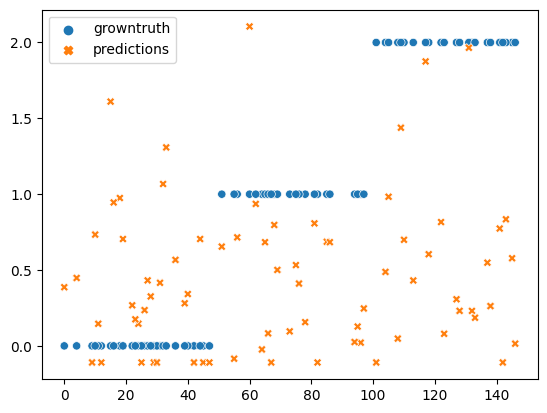

In [31]:
### see how well was the testing of the model

regression_res_df = pd.DataFrame({'growntruth': y_test,'predictions': y_pred})

sn.scatterplot(regression_res_df)